In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib
from matplotlib import pyplot as plt

In [141]:
df = pd.read_csv('/Users/apple/Downloads/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [142]:
df.shape

(918, 12)

In [143]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [145]:
df.columns[:11]

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [154]:
import warnings
warnings.filterwarnings('ignore')
df1 = df[df.HeartDisease == True]
df1.shape
df_cat = df1[['Sex', 'ChestPainType', 'FastingBS',
       'RestingECG', 'ExerciseAngina', 'ST_Slope']]
df_cat

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
1,F,NAP,0,Normal,N,Flat
3,F,ASY,0,Normal,Y,Flat
8,M,ASY,0,Normal,Y,Flat
11,M,ATA,0,ST,Y,Flat
13,M,ASY,0,Normal,Y,Flat
...,...,...,...,...,...,...
912,F,ASY,0,Normal,Y,Flat
913,M,TA,0,Normal,N,Flat
914,M,ASY,1,Normal,N,Flat
915,M,ASY,0,Normal,Y,Flat


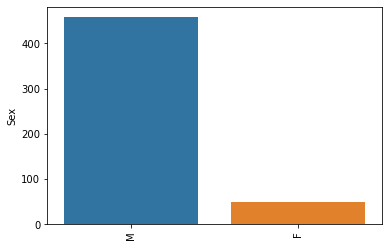

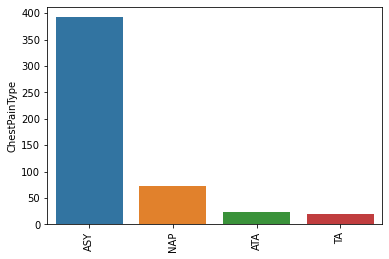

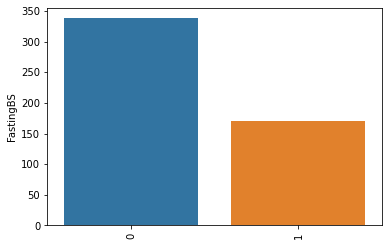

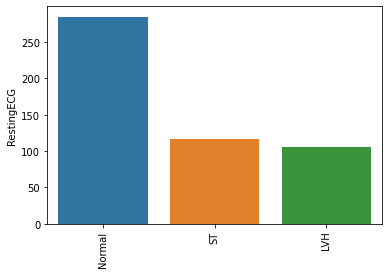

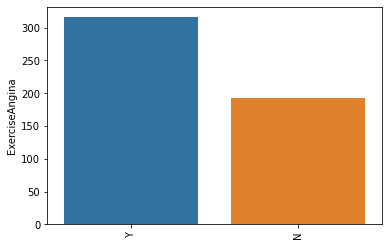

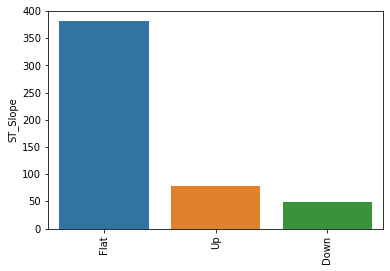

In [156]:
for i in df_cat.columns:
    OutLet_Num = df_cat[i].value_counts()
    chart = sns.barplot(x=OutLet_Num.index, y=OutLet_Num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [116]:
df['Sex'].replace({'M':1, 'F':0}, inplace=True)
df['ExerciseAngina'].replace({'Y':1, 'N':0}, inplace=True)

# using 'pd.get_dummies()'
cat_cols=df.select_dtypes('object')
cat_col_encode = pd.get_dummies(cat_cols)

# drop categorical columns
df.drop(columns=cat_cols, axis=1, inplace=True)

# combine new columns with original data
df_new = pd.concat([df, cat_col_encode], axis=1) 

# view first 5 rows
df_new.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [117]:
from sklearn.preprocessing import StandardScaler
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
scale = StandardScaler()
scaled_df = scale.fit_transform(X)
scaled_data = pd.DataFrame(scaled_df, columns=X.columns)
scaled_X = scaled_data

In [118]:
scaled_X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak
0,-1.433140,0.515952,0.410909,0.825070,-0.551341,1.382928,-0.823556,-0.832432
1,-0.478484,-1.938163,1.491752,-0.171961,-0.551341,0.754157,-0.823556,0.105664
2,-1.751359,0.515952,-0.129513,0.770188,-0.551341,-1.525138,-0.823556,-0.832432
3,-0.584556,-1.938163,0.302825,0.139040,-0.551341,-1.132156,1.214246,0.574711
4,0.051881,0.515952,0.951331,-0.034755,-0.551341,-0.581981,-0.823556,-0.832432
...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,-1.210356,0.596393,-0.551341,-0.188999,-0.823556,0.293283
914,1.536902,0.515952,0.627078,-0.053049,1.813758,0.164684,-0.823556,2.357094
915,0.370100,0.515952,-0.129513,-0.620168,-0.551341,-0.857069,1.214246,0.293283
916,0.370100,-1.938163,-0.129513,0.340275,-0.551341,1.461525,-0.823556,-0.832432


In [124]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from math import sqrt
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.3,random_state=42)

In [125]:
len(X_train)

642

In [126]:
len(X_test)

276

In [132]:
LR_model = LogisticRegression(random_state=42)

# fit model
LR_model.fit(X_train, y_train)

# predictions
preds = LR_model.predict(X_test)

# accuracy
mse = mean_squared_error(y_test, preds)
rmse = sqrt(mse)

acc = accuracy_score(y_test, preds)

In [133]:
acc,rmse

(0.822463768115942, 0.42135048580019224)

In [135]:
# DecisionTreeClassifier model
Dt_clf = DecisionTreeClassifier(criterion='gini',random_state=5)

# fit model
Dt_clf.fit(X_train, y_train)

# predictions
preds = Dt_clf.predict(X_test)

# accuracy
mse = mean_squared_error(y_test, preds)
rmse = sqrt(mse)

acc = accuracy_score(y_test, preds)

In [136]:
acc,rmse

(0.7065217391304348, 0.5417363388859614)

In [137]:
# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=453)

# fit model
RF_clf.fit(X_train, y_train)

# predictions
preds = RF_clf.predict(X_test)

# accuracy
mse = mean_squared_error(y_test, preds)
rmse = sqrt(mse)

acc = accuracy_score(y_test, preds)

In [138]:
acc,rmse

(0.7971014492753623, 0.45044261646145084)